### Importing all the necessary Libraries.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

### 1. Importing the dataset

In [4]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

### Basic exploration about the dataset

In [5]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
int64_col = data.select_dtypes(include = 'int64')
print("Integer Columns: ", int64_col.columns.to_list())
float64_col = data.select_dtypes(include = 'float64')
print("Float Columns : ", float64_col.columns.to_list())
object_col = data.select_dtypes(include = 'object')
print("Object Columns : ", object_col.columns.to_list())
numeric_col = data.select_dtypes('number')
print("Numeric Columns : ", numeric_col.columns.to_list())

Integer Columns:  []
Float Columns :  ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Object Columns :  []
Numeric Columns :  ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [9]:
for column in numeric_col:
    value_counts = data[column].value_counts(dropna = False).reset_index()
    value_counts.columns = ['Value', 'Count']
    print(f"Value counts for column '{column}':\n{value_counts.to_string(index=False)}\n")

Value counts for column 'Diabetes_012':
 Value  Count
   0.0 213703
   2.0  35346
   1.0   4631

Value counts for column 'HighBP':
 Value  Count
   0.0 144851
   1.0 108829

Value counts for column 'HighChol':
 Value  Count
   0.0 146089
   1.0 107591

Value counts for column 'CholCheck':
 Value  Count
   1.0 244210
   0.0   9470

Value counts for column 'BMI':
 Value  Count
  27.0  24606
  26.0  20562
  24.0  19550
  25.0  17146
  28.0  16545
  23.0  15610
  29.0  14890
  30.0  14573
  22.0  13643
  31.0  12275
  32.0  10474
  21.0   9855
  33.0   8948
  34.0   7181
  20.0   6327
  35.0   5575
  36.0   4633
  37.0   4147
  19.0   3968
  38.0   3397
  39.0   2911
  40.0   2258
  18.0   1803
  41.0   1659
  42.0   1639
  43.0   1500
  44.0   1043
  45.0    819
  17.0    776
  46.0    750
  47.0    622
  48.0    484
  49.0    416
  50.0    372
  16.0    348
  51.0    253
  53.0    237
  52.0    215
  55.0    169
  15.0    132
  54.0    113
  56.0    109
  57.0     86
  58.0     71
  79.0

In [10]:
#data["Diabetes_012"]= data["Diabetes_012"].replace({0:"Non-Diabetic",1:"Pre-Diabetic",2:"Diabetic"})

In [11]:
#data['Diabetes_012'].value_counts()

### Data Preprocessing : 

In [12]:
import warnings
warnings.filterwarnings("ignore")
data2 = data.copy() 
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Pre-Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

In [13]:
data2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Excellent,18.0,15.0,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Excellent,30.0,30.0,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,0.0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Fair,3.0,0.0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"


In [14]:
data2.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Data Visualisations

array([[<AxesSubplot:title={'center':'Diabetes_012'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <A

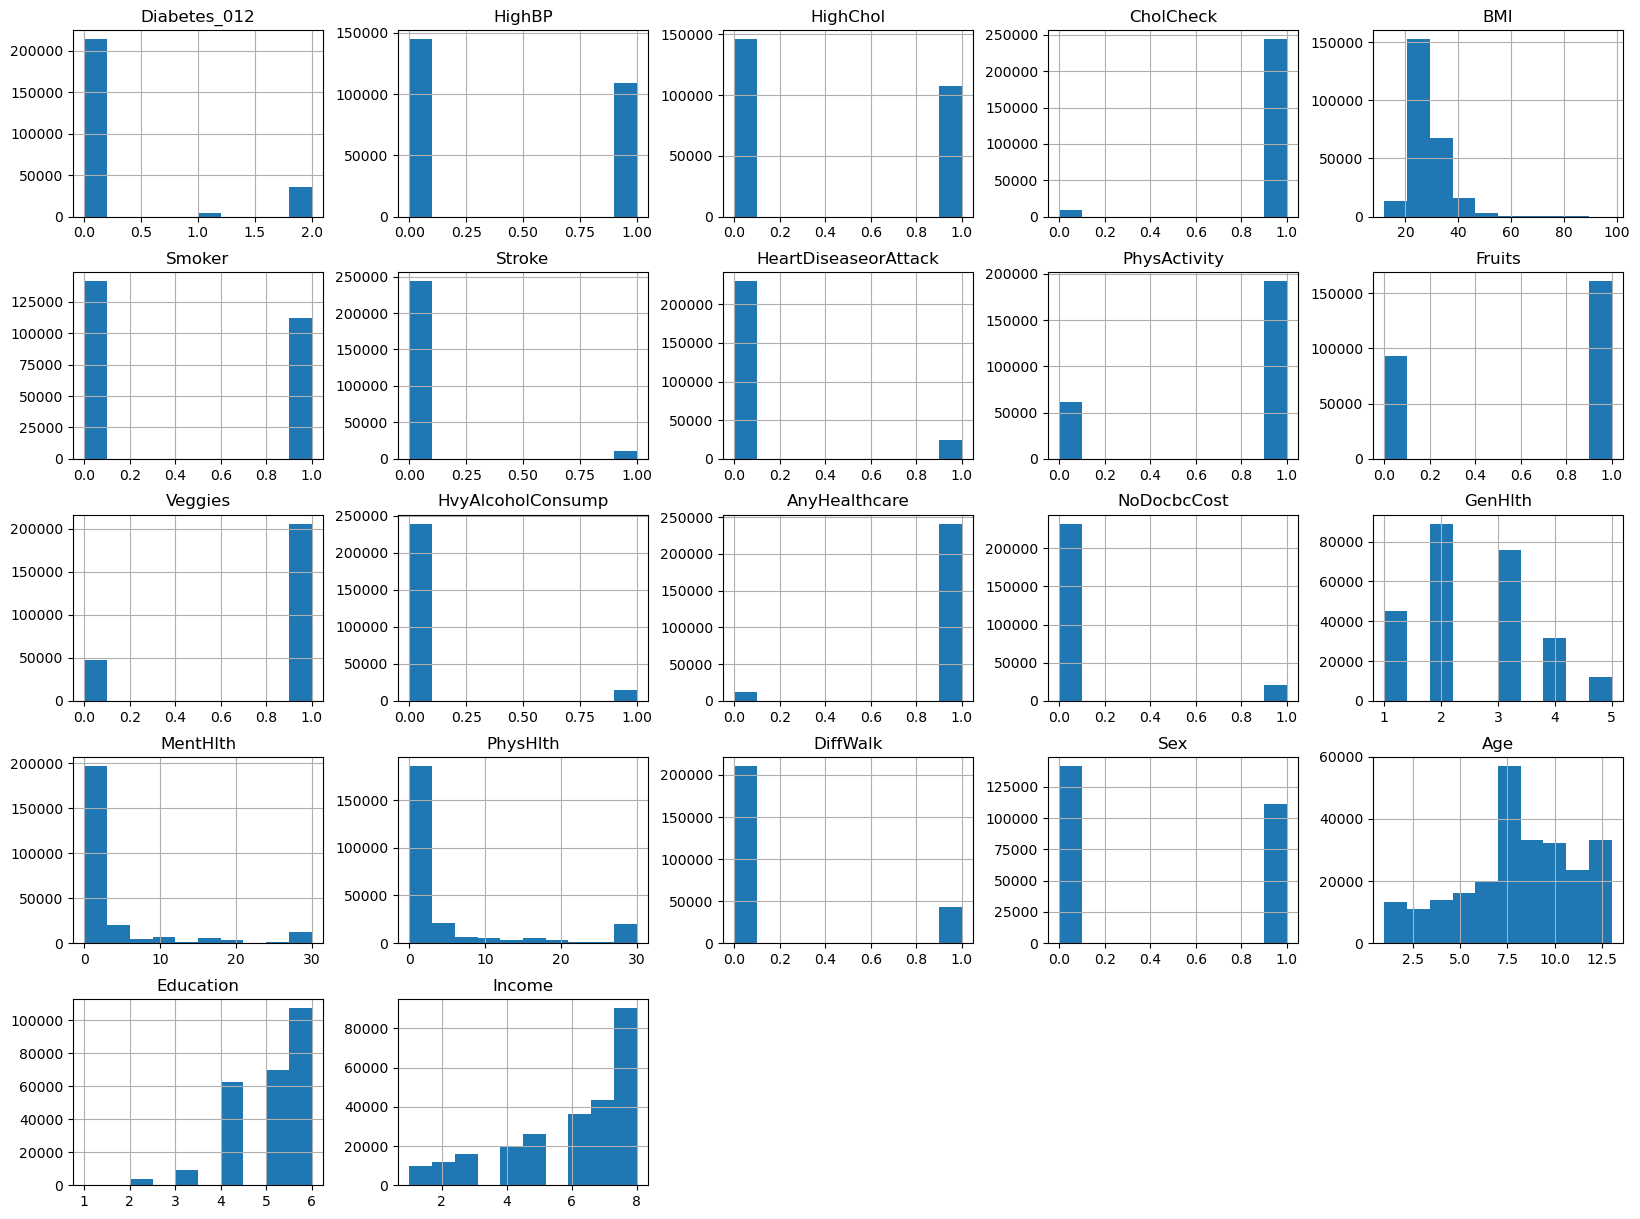

In [15]:
data.hist(figsize=(20,15))

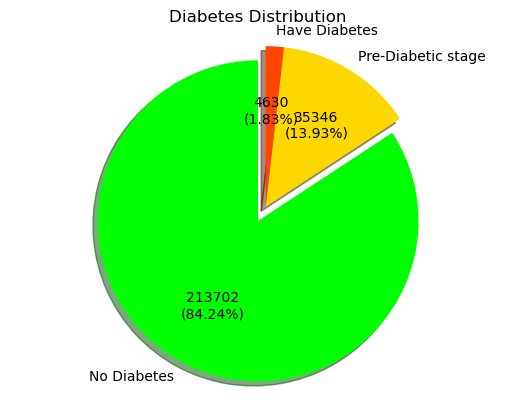

In [16]:
labels = ["No Diabetes", "Pre-Diabetic stage", "Have Diabetes"]
sizes = data["Diabetes_012"].value_counts()
colors = ['#00FF00', '#FFD700', '#FF4500'] 
explode = (0.1, 0, 0)
fig, ax = plt.subplots()
count_perc = lambda pct: f'{int(pct * sum(sizes) / 100)}\n({pct:.2f}%)'

ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct=count_perc,
       shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Diabetes Distribution')
plt.show()

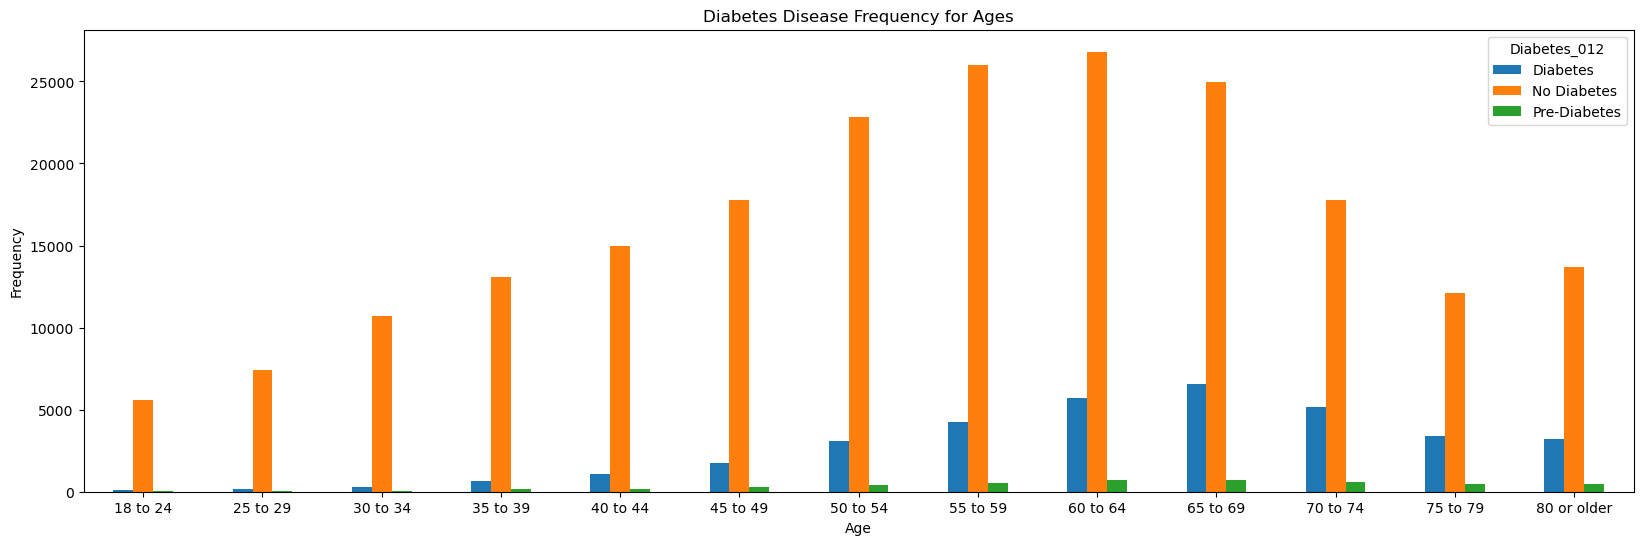

In [17]:
pd.crosstab(data2.Age,data2.Diabetes_012).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

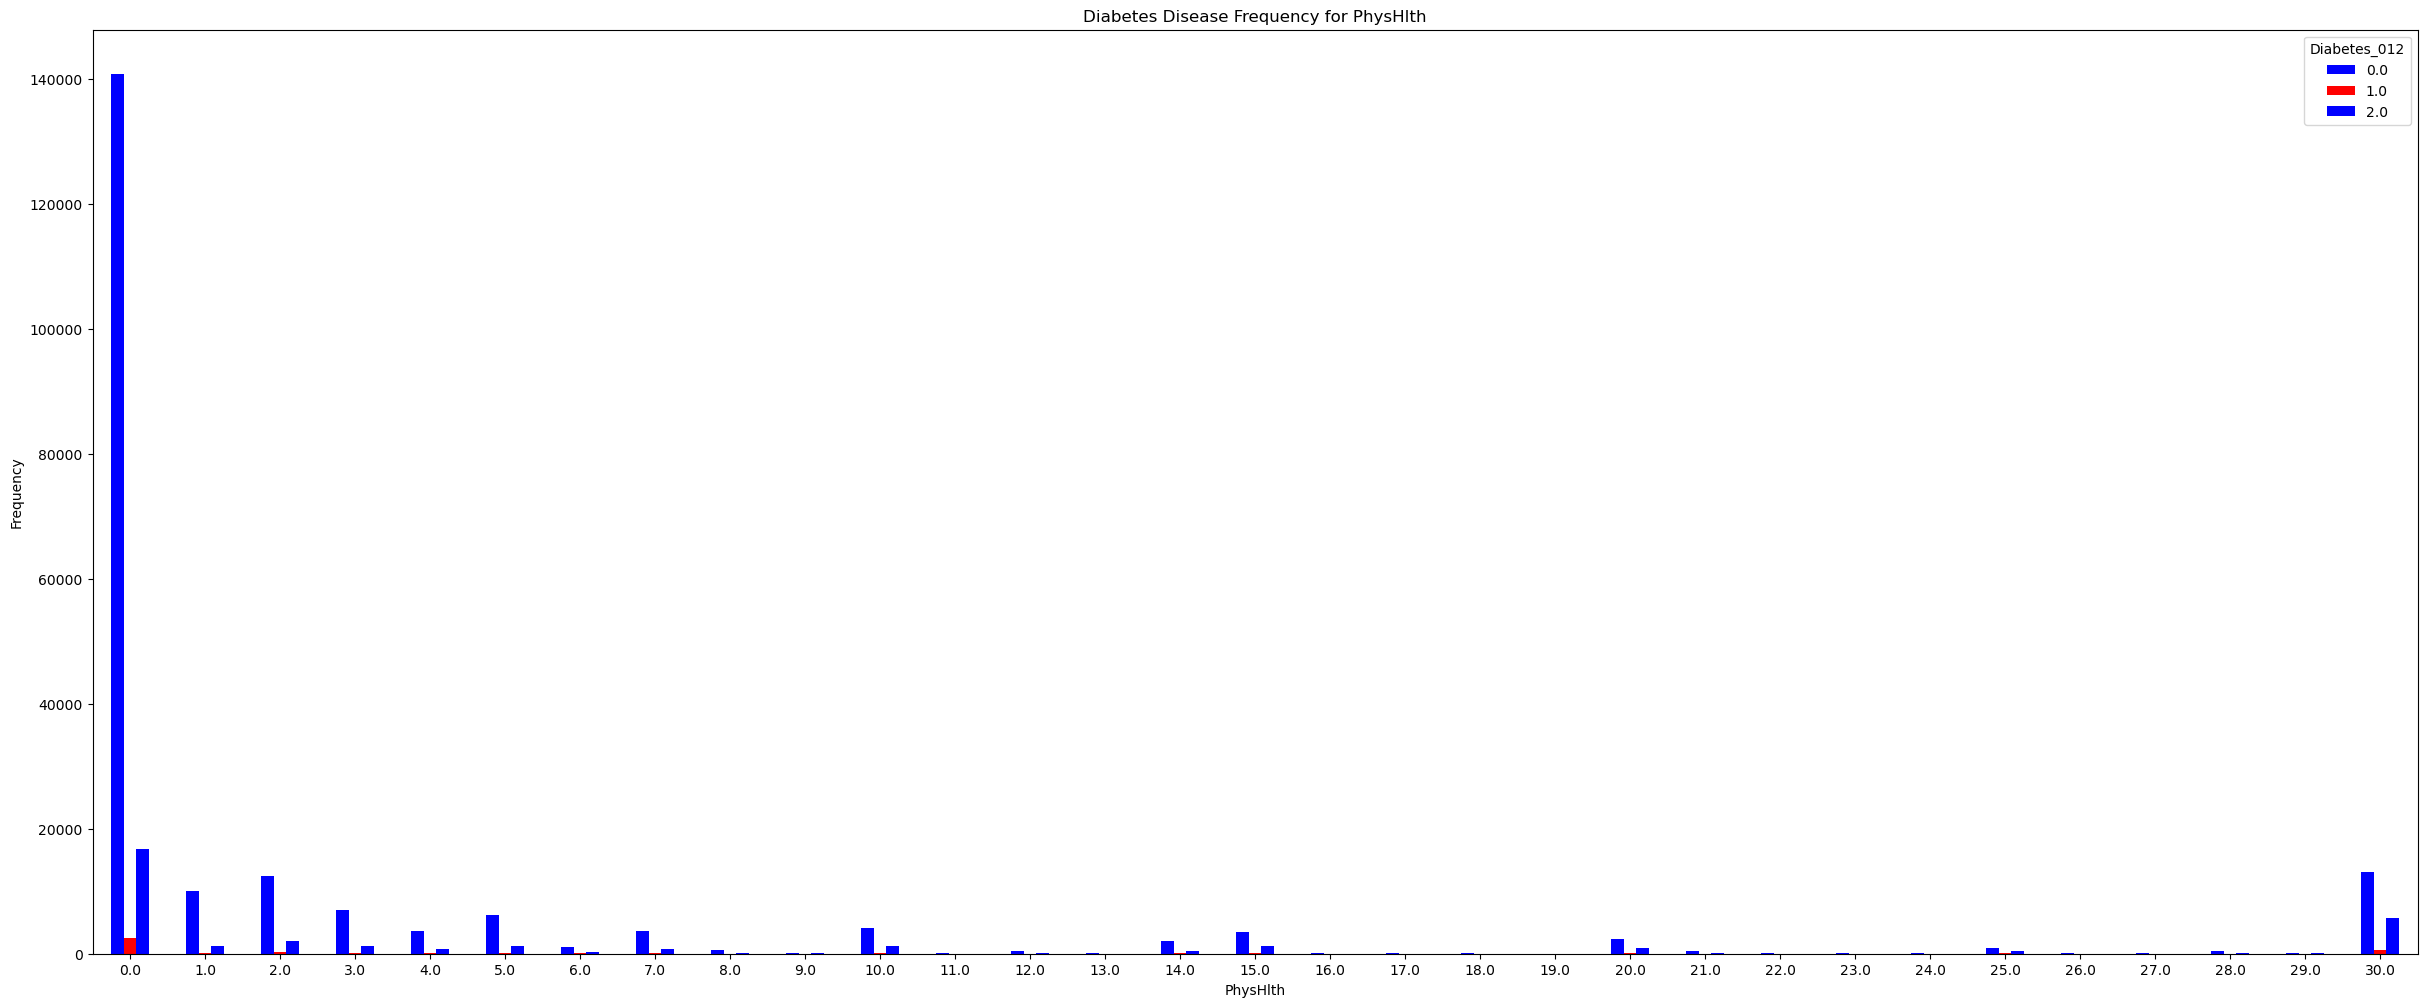

In [18]:
pd.crosstab(data.PhysHlth,data.Diabetes_012).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

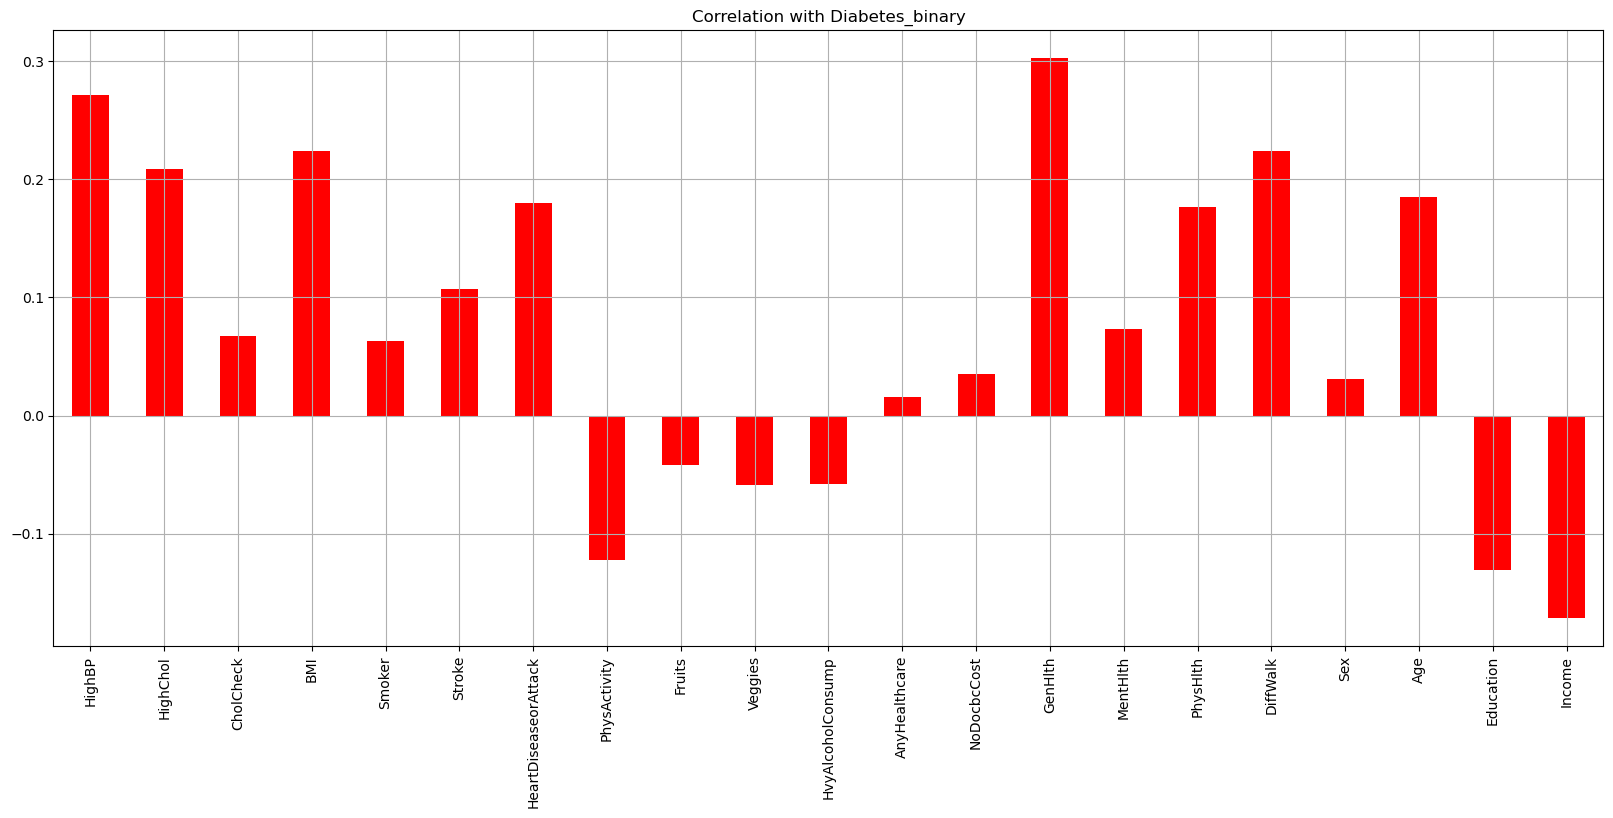

In [19]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="red");

Text(0.5, 1.0, 'correlation of feature')

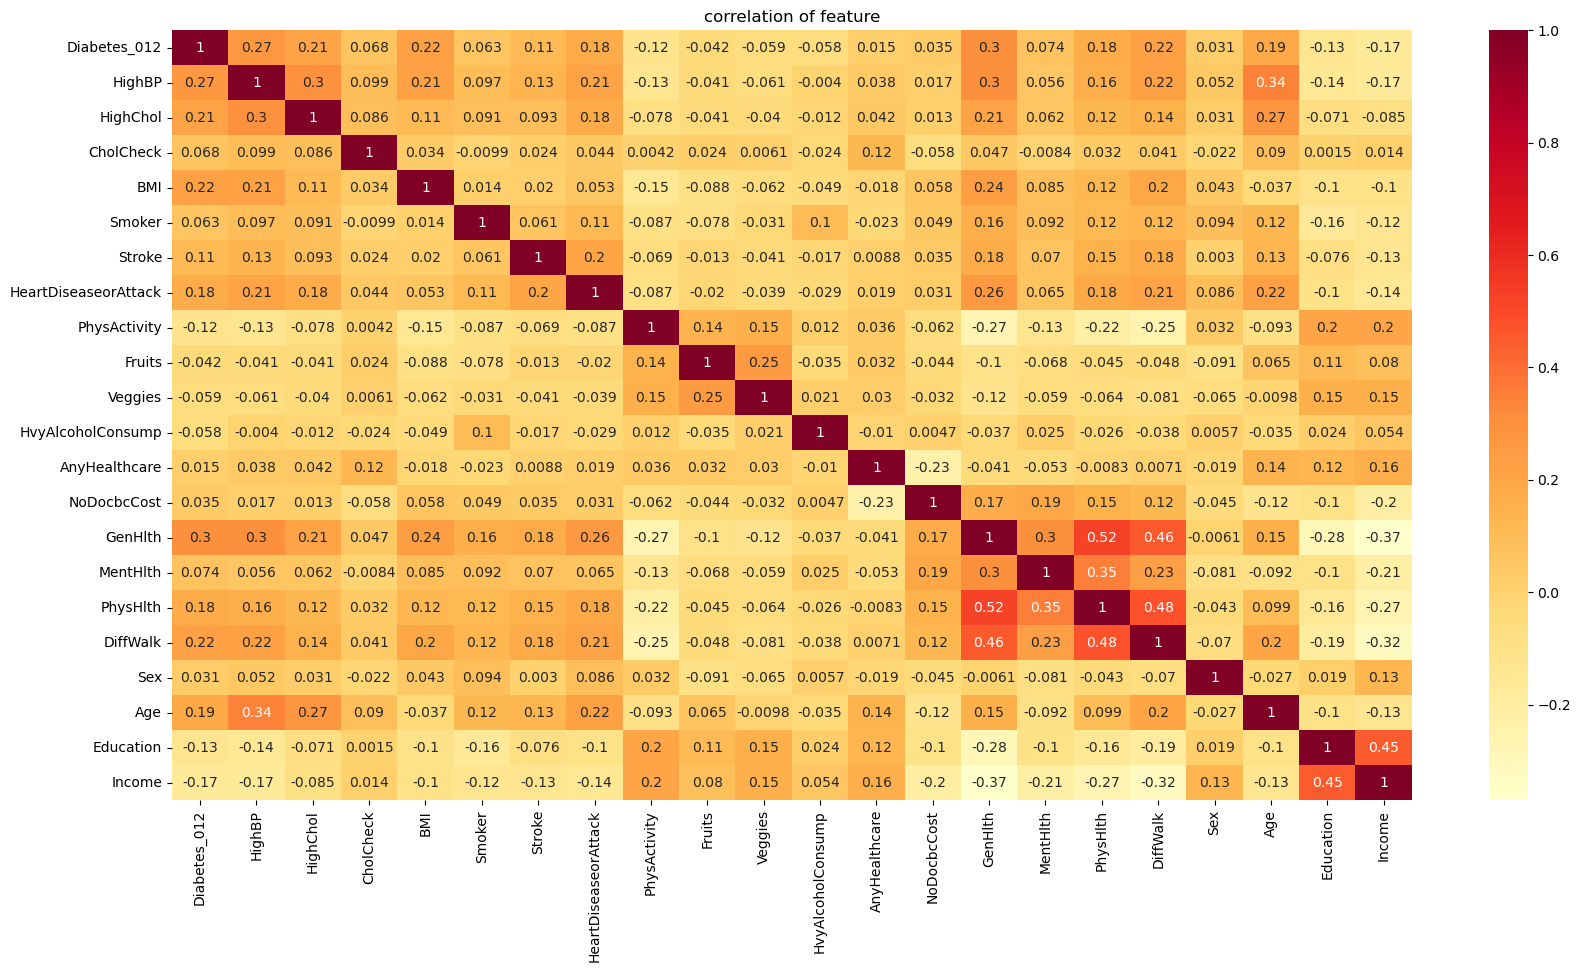

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

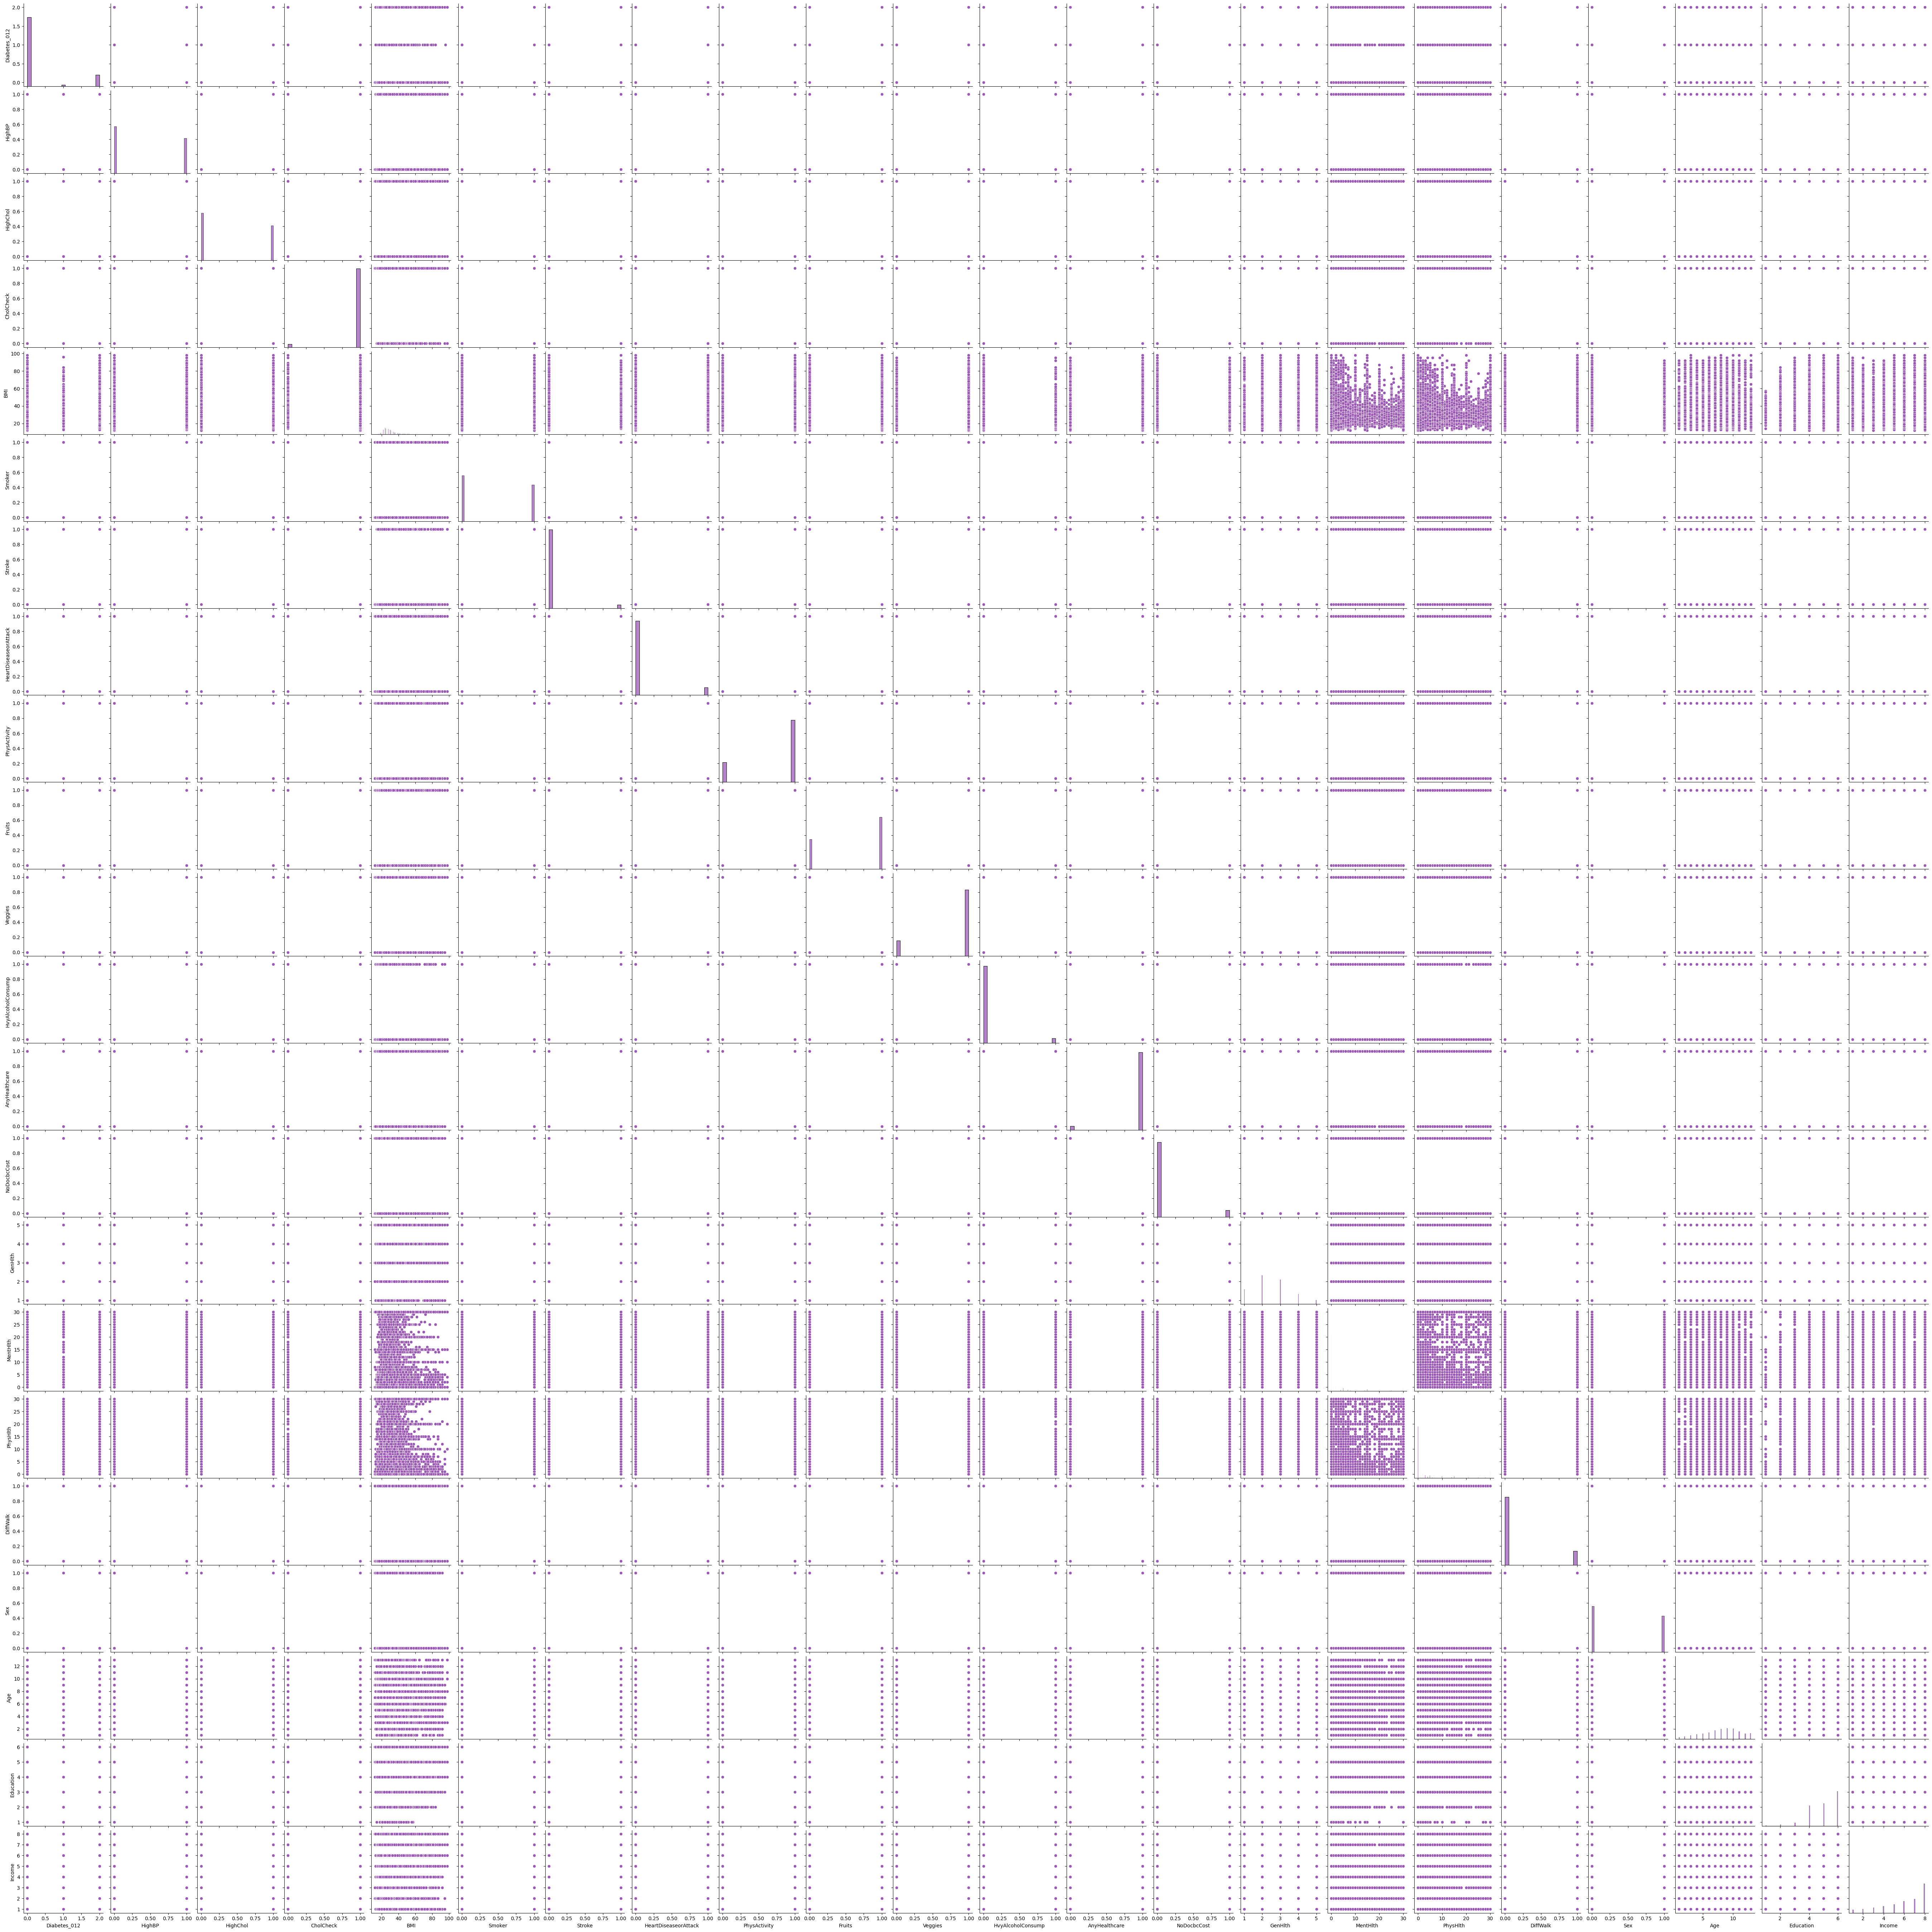

In [56]:
sns.pairplot(data)

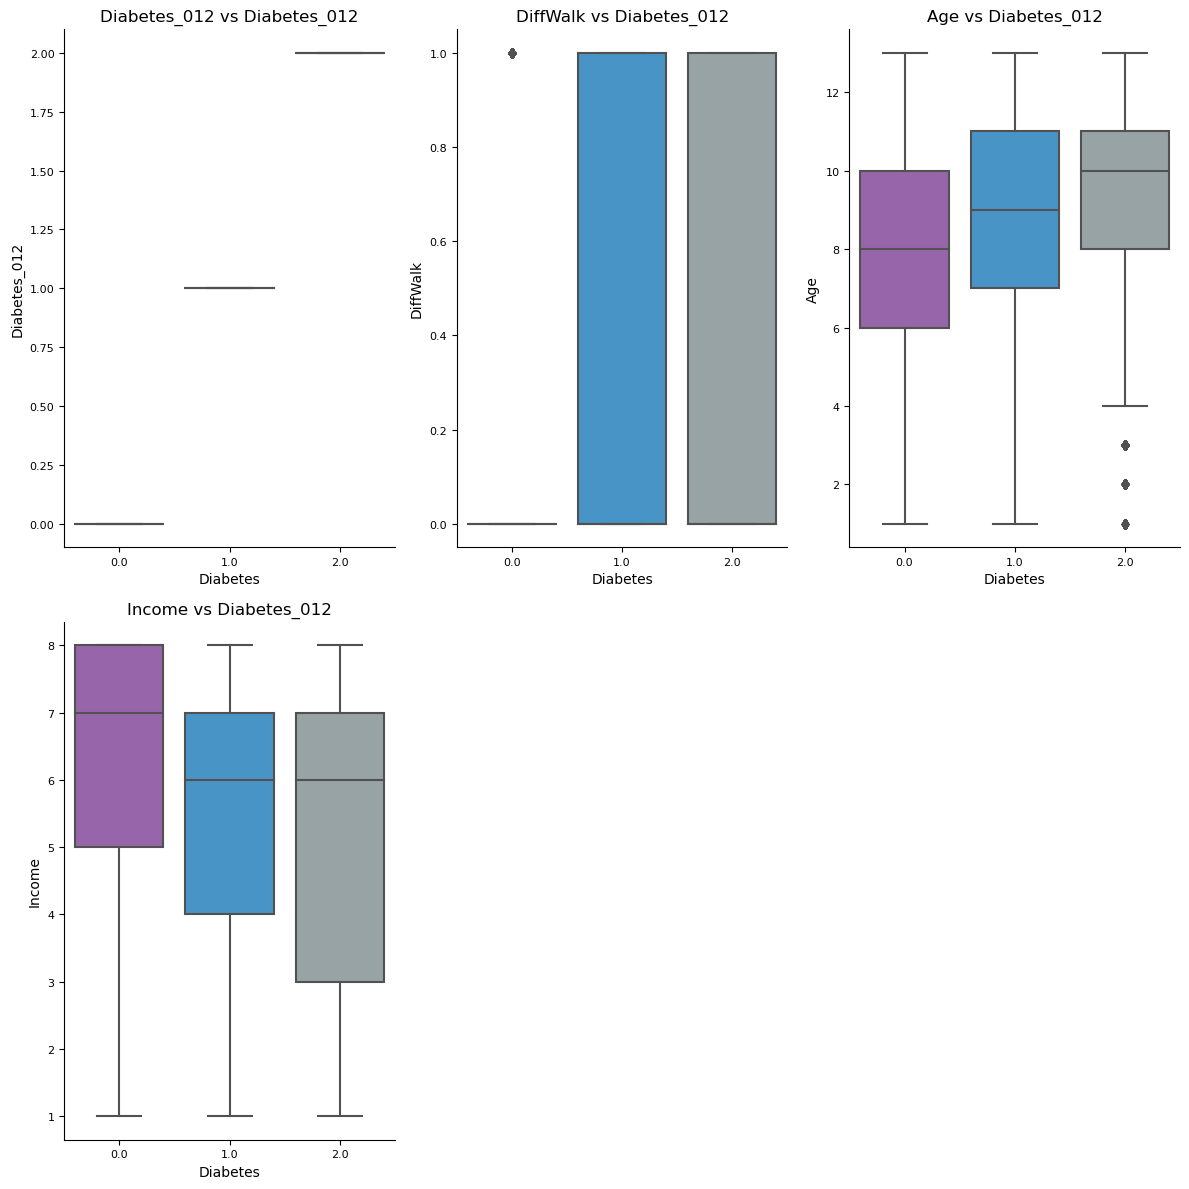

In [22]:
features = ['Diabetes_012','DiffWalk', 'Age', 'Income']
subset_data = data[features]
custom_palette = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#2ecc71', '#f1c40f', '#1abc9c', '#c0392b', '#2980b9', '#f39c12']
sns.set_palette(custom_palette)
num_columns = 3
num_rows = (len(features) + num_columns - 1) // num_columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 6*num_rows))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x='Diabetes_012', y=feature, data=subset_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Diabetes_012', fontsize=12)
    axes[i].set_xlabel('Diabetes', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].tick_params(axis='both', labelsize=8)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
if len(features) % num_columns != 0:
    for j in range(len(features), num_rows * num_columns):
        fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Checking Null Values and Handling it:

In [25]:
null_counts = data.isnull().sum()
total_counts = data.count()
dict_1 = {'Total Count' : total_counts, "Null Count" : null_counts}
null_table = pd.DataFrame(dict_1)
null_table.index.name = "Column Names"
null_table

,Total Count,Null Count
Column Names,,
Diabetes_012,253680,0
HighBP,253680,0
HighChol,253680,0
CholCheck,253680,0
BMI,253680,0
Smoker,253680,0
Stroke,253680,0
HeartDiseaseorAttack,253680,0
PhysActivity,253680,0


### Splitting the dataset into 'x' and 'y' variables (y - Target Variable)

In [26]:
X = data.drop("Diabetes_012", axis = 1)
y = data["Diabetes_012"]

### Splitting the 'x' and 'y' into Training and Test Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the data using StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

### Logistic Regression 

In [39]:
lj = LogisticRegression(solver="liblinear").fit(X_train, y_train)
predict_lj = lj.predict(X_test)
acc_lj = accuracy_score(y_test, predict_lj)
print("The accuracy of logistic regression is : ", acc_lj)
print(classification_report(y_test, predict_lj))

SyntaxError: invalid non-printable character U+00A0 (1220607892.py, line 5)

In [40]:
lj = LogisticRegression(solver="liblinear").fit(X_train, y_train)
predict_lj = lj.predict(X_test)
acc_lj = accuracy_score(y_test, predict_lj)


In [41]:
print("The accuracy of Logistic Regression is : ", acc_lj)
print(classification_report(y_test, predict_lj))

SyntaxError: invalid non-printable character U+00A0 (2127118239.py, line 2)

### Gaussian Naive Bayes

In [43]:
gnb = GaussianNB().fit(X_train, y_train)
predict_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, predict_gnb)
acc_gnb
print("The accuracy of Gaussian Naive Bayes is : ", acc_gnb)


The accuracy of Gaussian Naive Bayes is :  0.7584489645747924


In [47]:
classification_report(y_test, predict_gnb)

SyntaxError: invalid non-printable character U+00A0 (3679926464.py, line 1)

### KNN

In [48]:
knnc = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
predict_knnc = knnc.predict(X_test)
acc_knnc = accuracy_score(y_test, predict_knnc)
print("The accuracy of KNN Classifier is : ", acc_knnc)

The accuracy of KNN Classifier is :  0.8202328392725744


### Decision Tree (CART)

In [49]:
cartc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
predict_cartc = cartc.predict(X_test)
acc_cartc = accuracy_score(y_test, predict_cartc)
print("The accuracy of Deicision Tree Classifier is : ", acc_cartc)

The accuracy of Deicision Tree Classifier is :  0.7653342794071271


### Random Forest 

In [51]:
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, predict_rfc)
print("The accuracy of Random Forest Classifier is : ", acc_rfc)

The accuracy of Random Forest Classifier is :  0.8405997056659308


### Gradient Boosting

In [52]:
gbmc = GradientBoostingClassifier(verbose=False).fit(X_train, y_train)
predict_gbmc = gbmc.predict(X_test)
acc_gbmc = accuracy_score(y_test, predict_gbmc)
print("The accuracy of Gradient Boosting is : ", acc_gbmc)

The accuracy of Gradient Boosting is :  0.8484310942920215


### XG Boosting

In [53]:
xgbc = XGBClassifier().fit(X_train, y_train)
predict_xgbc = xgbc.predict(X_test)
acc_xgbc = accuracy_score(y_test, predict_xgbc)
print("The accuracy of XG Boost is ", acc_xgbc)

The accuracy of XG Boost is  0.8479317775675391


### Light Gradient Boosting 

In [54]:
lgbmc = LGBMClassifier().fit(X_train, y_train)
predict_lgbmc = lgbmc.predict(X_test)
acc_lgbmc = accuracy_score(y_test, predict_lgbmc)
print("The accuracy of Light Gradient Boosting is ", acc_lgbmc)

The accuracy of Light Gradient Boosting is  0.8484310942920215


### Exporting the Logistic Regression model to Pickle File

In [55]:
import pickle
pickle.dump(lj,open("diabetes_lj_model.pkl","wb"))

In [ ]:
X_test.tail(5)

In [ ]:
y_test

In [ ]:
rows_with_2 = data[data['Diabetes_012'] == 2]

rows_with_2

In [ ]:
lj.predict([[1,1,1,30,1,0,1,0,1,0,1,1,0,5,30,30,1,0,9,4,1]])